In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr

plt.style.use('seaborn')

In [6]:
bus = pd.read_csv('./data/bus.csv')
bus.rename({'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114': 'riders'}, axis=1, inplace=True)
bus.drop([114,115], inplace=True)
bus.riders = bus.riders.astype(int)
bus.Month = pd.to_datetime(bus.Month, format='%Y-%m')
bus.set_index('Month', inplace=True)
bus = bus.resample('M').sum()

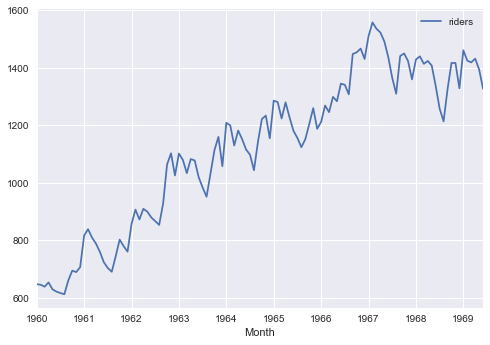

In [44]:
bus.plot();

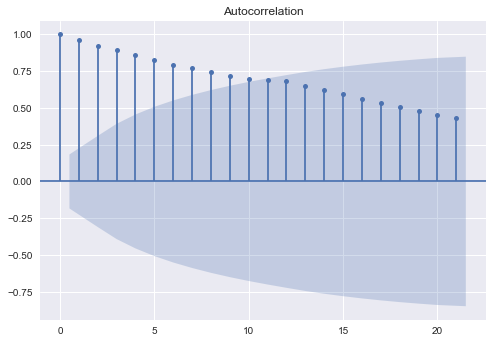

In [7]:
plot_acf(bus);

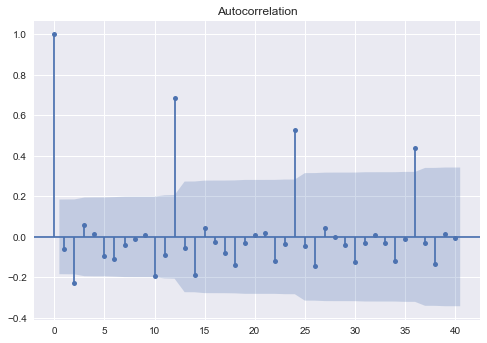

In [54]:
plot_acf(bus.diff().dropna(), lags=40);

C:\Users\Harry Gulliver\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


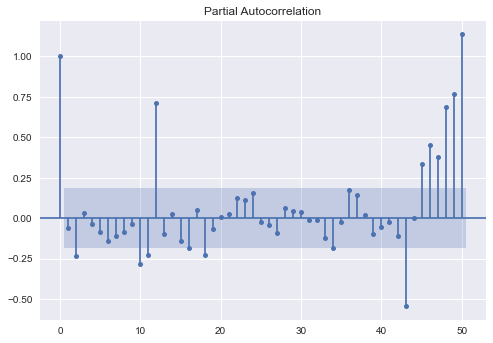

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(bus.diff().dropna(), lags=50);

In [9]:
bus.shift(12).head(15)

,riders
Month,
1960-01-31,NaN
1960-02-29,NaN
1960-03-31,NaN
1960-04-30,NaN
1960-05-31,NaN
1960-06-30,NaN
1960-07-31,NaN
1960-08-31,NaN
1960-09-30,NaN


In [48]:
pearsonr(bus.shift(12).fillna(0).riders, bus.riders)

(0.9245164957753459, 9.806828588486937e-49)

In [55]:
import statsmodels.api as sm

In [58]:
sm.tsa.acf(bus, nlags=12)

array([1.        , 0.96185762, 0.92394043, 0.89402625, 0.86212294,
       0.82747604, 0.7949652 , 0.7697359 , 0.74331566, 0.71953315,
       0.69907988, 0.68922447, 0.68267552])

In [61]:
bus.to_csv('cleaned_bus.csv')

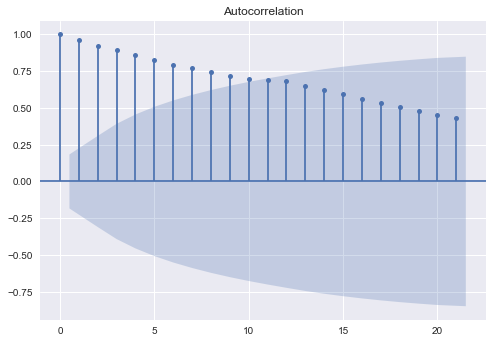

In [63]:
sm.graphics.tsa.plot_acf(bus);

In [60]:
sm.tsa.acovf(bus)

C:\Users\Harry Gulliver\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 72736.79193598,  69962.43738694,  67204.46310876,  65028.60163451,
        62708.05671921,  60187.95224712,  57823.21819669,  55988.12003423,
        54066.39629468,  52336.5331276 ,  50848.82785526,  50131.97669188,
        49655.62706744,  47280.03875416,  45006.70990534,  43140.88044095,
        41027.94694454,  38789.45527639,  36625.66043803,  34903.96732328,
        33063.38593521,  31321.78269427,  29735.47462107,  28628.7915094 ,
        27414.28014288,  24751.00885023,  22299.61567392,  20059.19941358,
        17763.00414433,  15343.48015854,  13008.17562489,  11113.09885363,
         9160.74584353,   7470.56981095,   6414.29467096,   6130.87102374,
         5473.08834297,   3709.86275669,   2044.08330768,    563.27877404,
         -677.18519328,  -1983.49311259,  -3378.41106575,  -4547.18543627,
        -5688.71634727,  -6549.78988677,  -7049.07195196,  -7003.45235511,
        -7426.4123212 ,  -8602.32211801,  -9872.94536511, -11225.40887075,
       -12382.38268725, -

In [13]:
bus.shift(-12)

,riders
Month,
1960-01-31,817.0
1960-02-29,839.0
1960-03-31,810.0
1960-04-30,789.0
1960-05-31,760.0
...,...
1969-02-28,NaN
1969-03-31,NaN
1969-04-30,NaN


In [14]:
pearsonr(bus.shift(-12).iloc[:-12].riders, bus.iloc[:-12].riders)

(0.9267671303408122, 2.5701059918729065e-44)

In [17]:
airline = pd.read_csv('./data/airline.csv')
airline.rename({'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'passengers'}, axis=1, inplace=True)
airline.drop(144, inplace=True)
airline.passengers = airline.passengers.astype(int)
airline.Month = pd.to_datetime(airline.Month, format='%Y-%m')
airline.set_index('Month', inplace=True)
airline = airline.resample('M').sum()

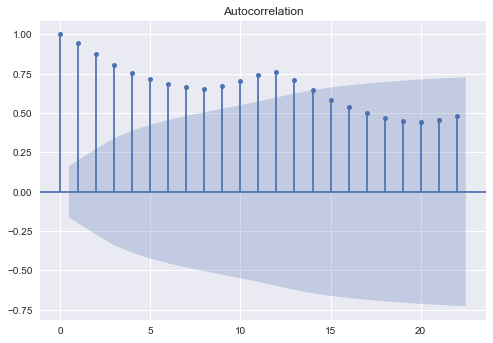

In [18]:
plot_acf(airline);

In [19]:
pearsonr(airline.shift(12).iloc[12:].passengers, airline.iloc[12:].passengers)

(0.9905273692085445, 5.6457698925054594e-114)

In [20]:
pearsonr(airline.shift(-12).iloc[:-12].passengers, airline.iloc[:-12].passengers)

(0.9905273692085445, 5.6457698925054594e-114)

In [21]:
pearsonr(airline.shift(1).iloc[1:].passengers, airline.iloc[1:].passengers)

(0.9601946480498526, 5.583565318793092e-80)

In [46]:
pearsonr(bus.shift(5).fillna(0).riders, bus.riders)

(0.8931309591824149, 1.1542751985928068e-40)

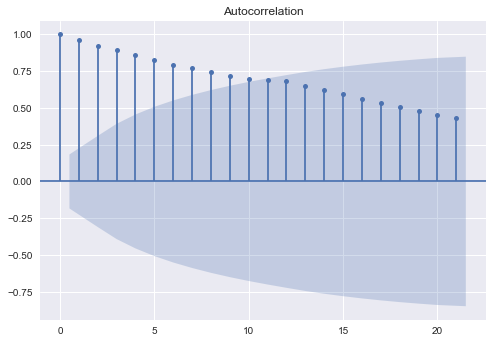

In [43]:
plot_acf(bus);